In [1]:
from docplex.mp.model import Model
import numpy as np

In [3]:
from docplex.mp.model import Model
import numpy as np
import matplotlib.pyplot as plt


P = np.array([[1, 1], [1, 0], [0, 1]])  
N = np.array([[0, 0]])  
theta0 = 99
theta1 = 100
theta = theta0 / theta1
# theta = 0.5
R = 3e-3
epsilon_P = 1e-3
epsilon_N = 2e-3
lambda_param = (len(P) + 1) * theta1

def solve_milp_with_lambda(P, N, theta, R, epsilon_P, epsilon_N, lambda_param):
    mdl = Model("MILP_with_lambda")

    d = P.shape[1]  
    num_P = len(P)
    num_N = len(N)

    x_vars = mdl.binary_var_list(num_P, name="x")
    y_vars = mdl.binary_var_list(num_N, name="y")
    w = mdl.continuous_var_list(d, name="w") 
    c = mdl.continuous_var(name="c")  
    V = mdl.continuous_var(name="V", lb=0) 

    mdl.add_constraint(V >= (theta - 1) * mdl.sum(x_vars) + theta * mdl.sum(y_vars) + theta * R)

    for i, s in enumerate(P):
        dot_product = mdl.sum(s[j] * w[j] for j in range(d))
        mdl.add_constraint(x_vars[i] <= 1 + dot_product - c - epsilon_P)

    for i, s in enumerate(N):
        dot_product = mdl.sum(s[j] * w[j] for j in range(d))
        mdl.add_constraint(y_vars[i] >= dot_product - c + epsilon_N)

    objective = mdl.sum(x_vars) - lambda_param * V
    mdl.maximize(objective)

    solution = mdl.solve()

    # mdl.solution.export("solution.json") 
    # mdl.write("lpex1.lp")




    if solution:
        x_values = [solution[x] for x in x_vars]
        y_values = [solution[y] for y in y_vars]
        w_values = [solution[w] for w in w]
        c_value = solution[c]
        V_value = solution[V]

        print("Solution found:")
        print("x values:", x_values)
        print("y values:", y_values)
        print("w values:", w_values)
        print("c value:", c_value)
        print("V value:", V_value)

        return solution, x_values, y_values, w_values, c_value, V_value
    else:
        print("No solution found.")
        return None


# lambda_param = 1.0  
solution, x_values, y_values, w_values, c_value, V_value = solve_milp_with_lambda(P, N, theta, R, epsilon_P, epsilon_N, lambda_param)


Solution found:
x values: [1.0, 1.0, 1.0]
y values: [0]
w values: [2.0, 2.0]
c value: 1.0
V value: 0


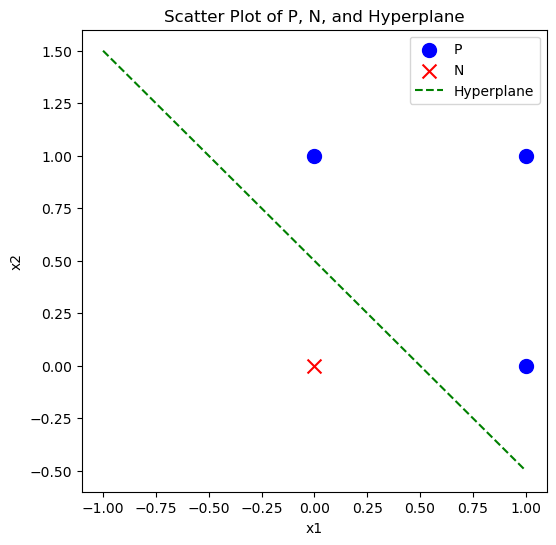

In [4]:
import numpy as np
import matplotlib.pyplot as plt


P = np.array(P)  
N = np.array(N)  

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(P[:, 0], P[:, 1], color='blue', label='P', marker='o', s=100) 
ax.scatter(N[:, 0], N[:, 1], color='red', label='N', marker='x', s=100)  

x1_vals = np.linspace(-1, 1, 100)
x2_vals = - (w_values[0] / w_values[1]) * x1_vals + c_value / w_values[1]

ax.plot(x1_vals, x2_vals, color='green', label='Hyperplane', linestyle='--')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Scatter Plot of P, N, and Hyperplane')

ax.legend()

plt.show()
